In [1]:
library(rstan)
library(brms)

rstan_options(auto_write=TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: Rcpp

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Loading 'brms' package (version 2.10.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:rstan’:

    loo




In [2]:
# データセット
data(gala, package = 'faraway')
head(gala)

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Baltra,58,23,25.09,346,0.6,0.6,1.84
Bartolome,31,21,1.24,109,0.6,26.3,572.33
Caldwell,3,3,0.21,114,2.8,58.7,0.78
Champion,25,9,0.10,46,1.9,47.4,0.18
Coamano,2,1,0.05,77,1.9,1.9,903.82
Daphne.Major,18,11,0.34,119,8.0,8.0,1.84


In [3]:
# データセットサイズの確認
sample_size <- nrow(gala)
sample_size

[1] 30


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




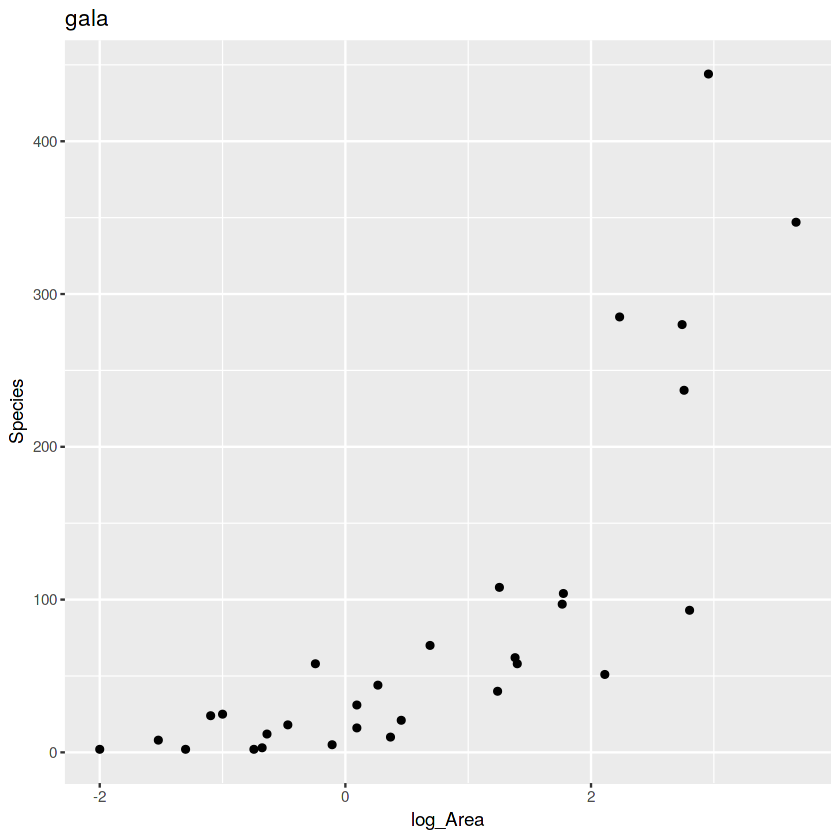

In [4]:
# 使いたい列だけ抽出して内容の確認
library(dplyr)
df <- select(.data = gala, Area, Species)
df$log_Area <- log10(df$Area) 
ggplot(data=df, mapping = aes(x=log_Area, y=Species)) + geom_point() + labs(title="gala")

In [5]:
glm_poiss_brms <- brm(
    formula = Species  ~ log_Area,
    family = poisson(),
    data = df,
    seed = 1,
    prior = c(
        set_prior("", class = "Intercept")
    )
)

Compiling the C++ model

Start sampling



In [6]:
glm_poiss_brms

 Family: poisson 
  Links: mu = log 
Formula: Species ~ log_Area 
   Data: df (Number of observations: 30) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     3.27      0.04     3.19     3.35 1.00     1172     1171
log_Area      0.78      0.02     0.75     0.81 1.00     1236     1342

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

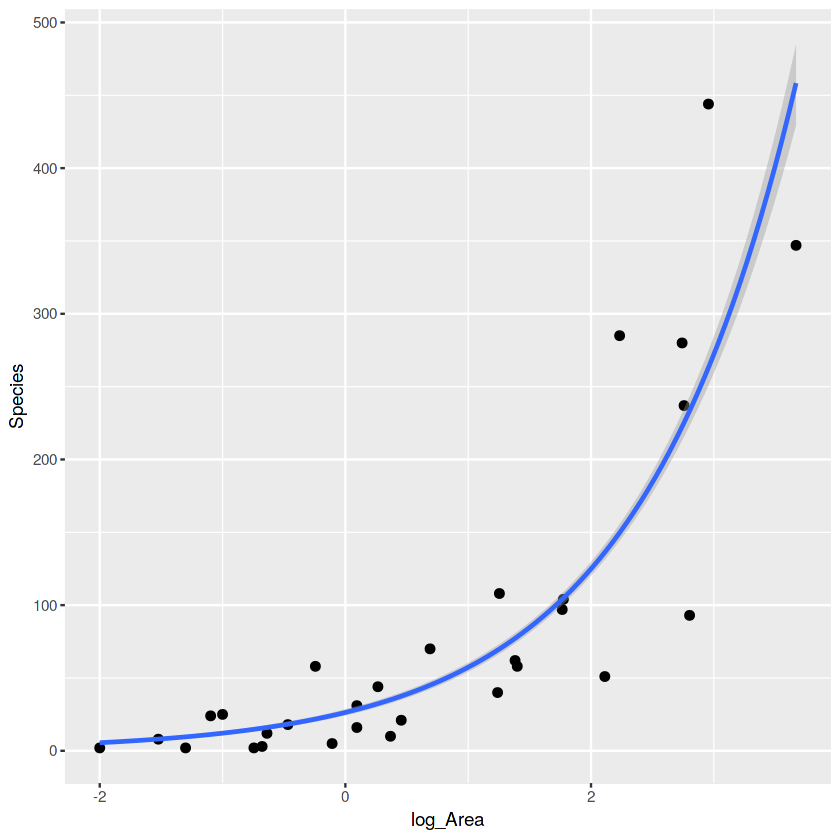

In [7]:
eff <- marginal_effects(glm_poiss_brms, effects="log_Area")
plot(eff,  points=TRUE )